# **Python for Acoustic Phonetics**

In [1]:
!pip install -q praat-parselmouth matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 33.0 MB/s eta 0:00:00


In [2]:
from google.colab import drive
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Audio, Image, display
import parselmouth as pm
import sys
plt.style.use('ggplot')

In [3]:
# mount to GD
drive.mount('/content/drive', force_remount=True)
print(f'Current wd: {os.getcwd()}')

Mounted at /content/drive
Current wd: /content


In [4]:
# change directory
os.chdir('drive/MyDrive/PORTFOLIOS/NLP-PROJECTS/PYTHON-FOR-LINGUISTICS/python-for-linguistic-analysis')
print(f'Current wd: {os.getcwd()}')

Current wd: /content/drive/MyDrive/PORTFOLIOS/NLP-PROJECTS/PYTHON-FOR-LINGUISTICS/python-for-linguistic-analysis


In [5]:
os.listdir('./src')

['phonetics.py']

In [6]:
sys.path.append('./src')
from phonetics import draw_spectrogram, draw_pitch, draw_intensity

In [7]:
# get list of items
os.listdir('./data')

['kata-mutiara.mp3']

In [8]:
# import audio file
snd = pm.Sound('./data/kata-mutiara.mp3')

# check for listening
Audio(data=snd, rate=snd.sampling_frequency)

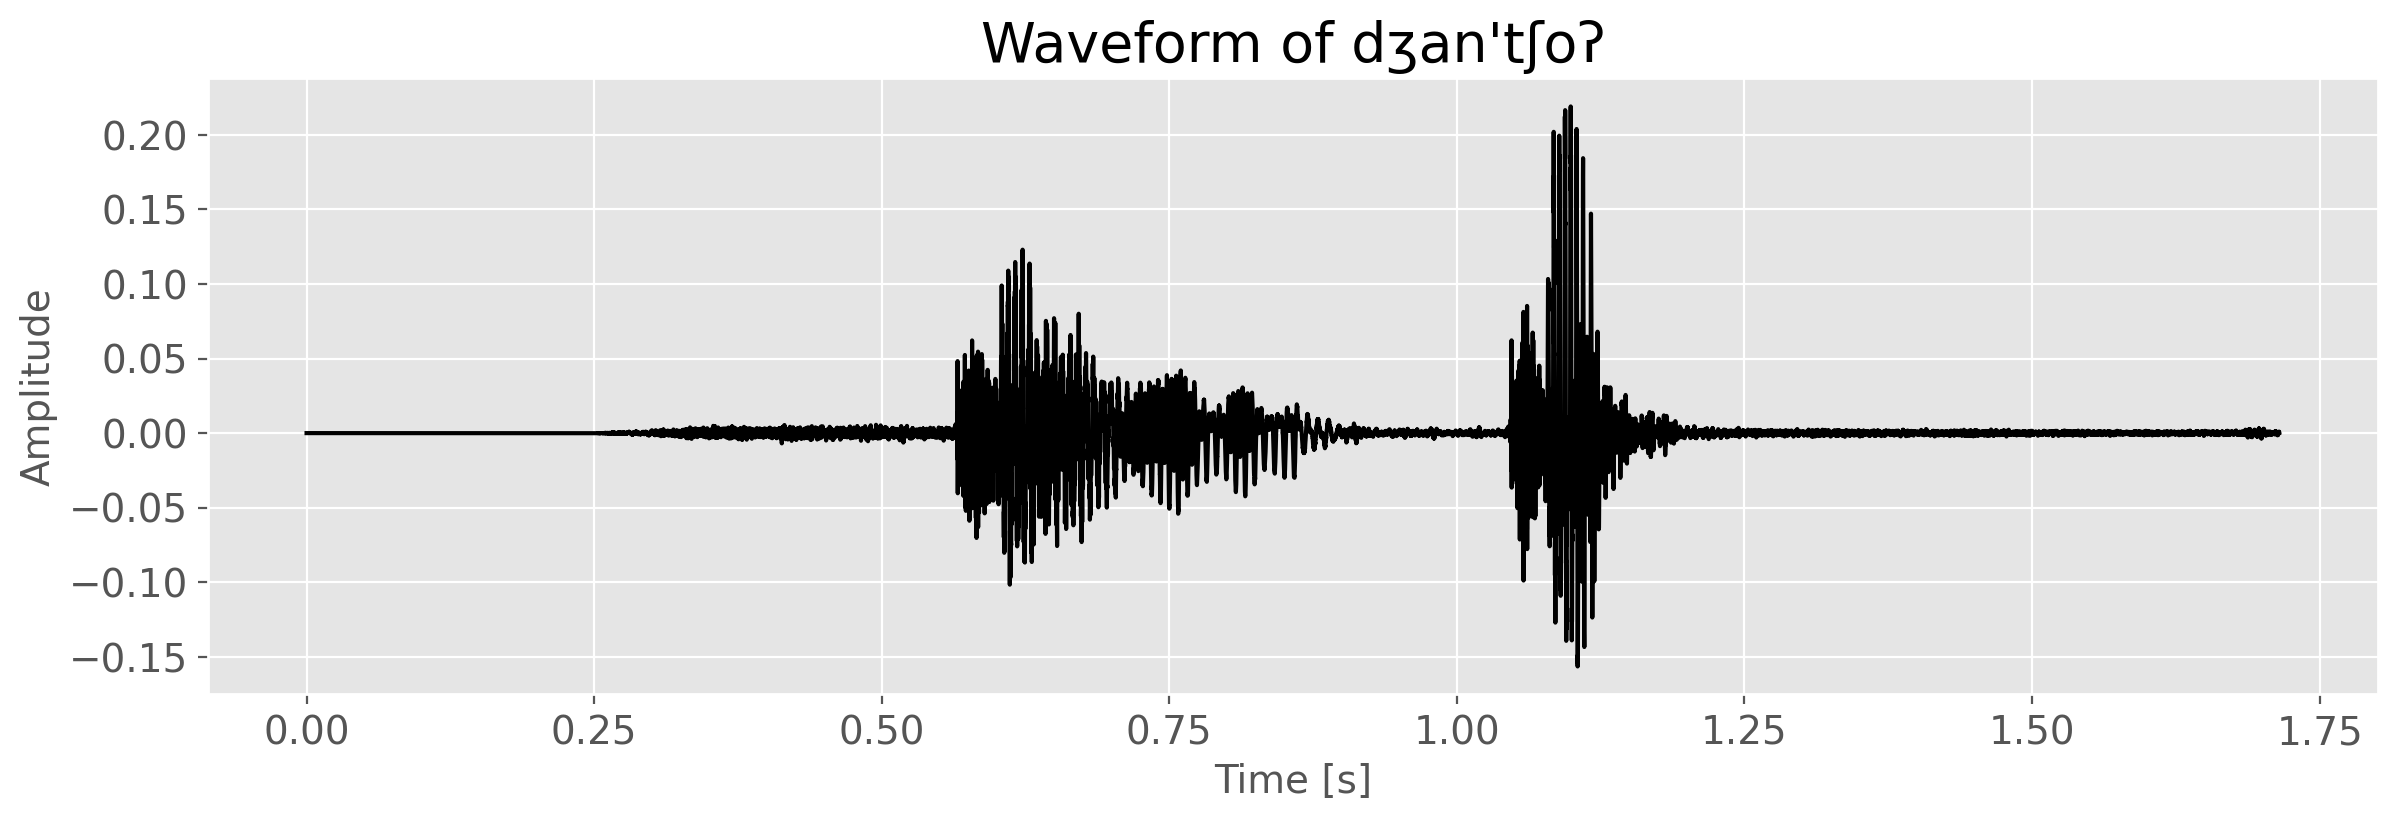

In [9]:
plt.figure(figsize=(14, 4), dpi=200)
plt.plot(snd.xs(), snd.values.T, color='black')
plt.grid(True)
plt.xticks(fontsize=14)
plt.xlabel('Time [s]', size=14)
plt.yticks(fontsize=14)
plt.ylabel('Amplitude', size=14)
plt.title('Waveform of dʒan\'tʃoʔ', size=20)
plt.show()

**Comment**
- The waveform shows the variation in amplitude over time (seconds). It indicates the intensity of sound with refence of production time. In general, the louder sound, the larger the amplitude is. The intensity of the amplitude is represented by the ups and downs of the line.
- It helps understand the pauses and stress in pronunciation. For example, in swear word "jancuk" \[dʒan'tʃoʔ] consists of two syllables, namely \[dʒan] and \[tʃoʔ], where the two syllables can be identified by a pause between them. Among these two syllables, the second one is more stressed than the first as indicated by the greater amplitude.
- Nonetheless, it is important to note that the audio contains unnecessary sound, especially at the beginning and the far end. For this reason, the most essential part of the audio can be extracted.

In [10]:
# filter necessary part
snd_filtered = snd.extract_part(from_time=0.50, to_time=1.25, preserve_times=True)
Audio(data=snd_filtered, rate=snd_filtered.sampling_frequency)

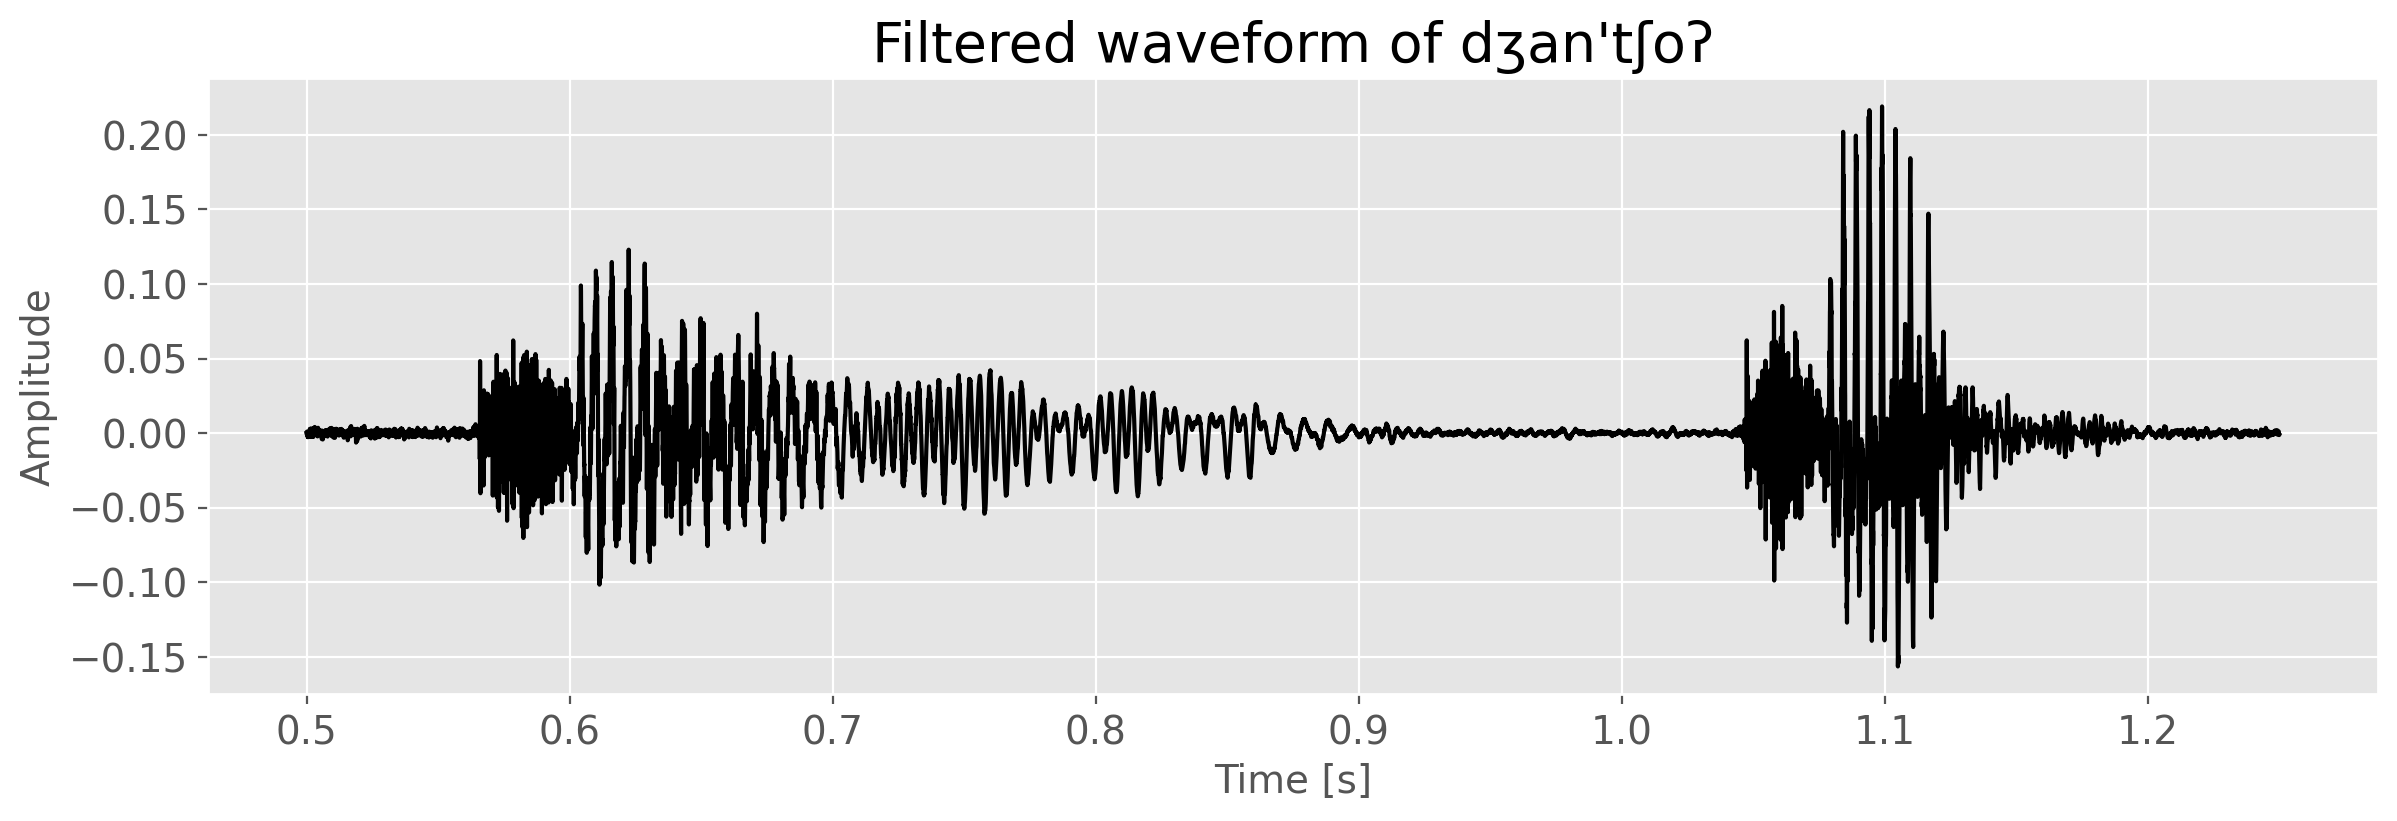

In [11]:
plt.figure(figsize=(14, 4), dpi=200)
plt.plot(snd_filtered.xs(), snd_filtered.values.T, color='black')
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Time [s]', size=14)
plt.ylabel('Amplitude', size=14)
plt.title('Filtered waveform of dʒan\'tʃoʔ', size=20)
plt.show()

**Comment**
- After obtaining the desired audio length, representing the essential part of the audio for a further exploration such as the spectogram (frequencies), pitch, and intensity.
- In short, spectogram

In [13]:
# get spectogram
spec = snd_filtered.to_spectrogram()

# get pitch
pitch = snd_filtered.to_pitch()

# get intensity
intensity = snd_filtered.to_intensity()

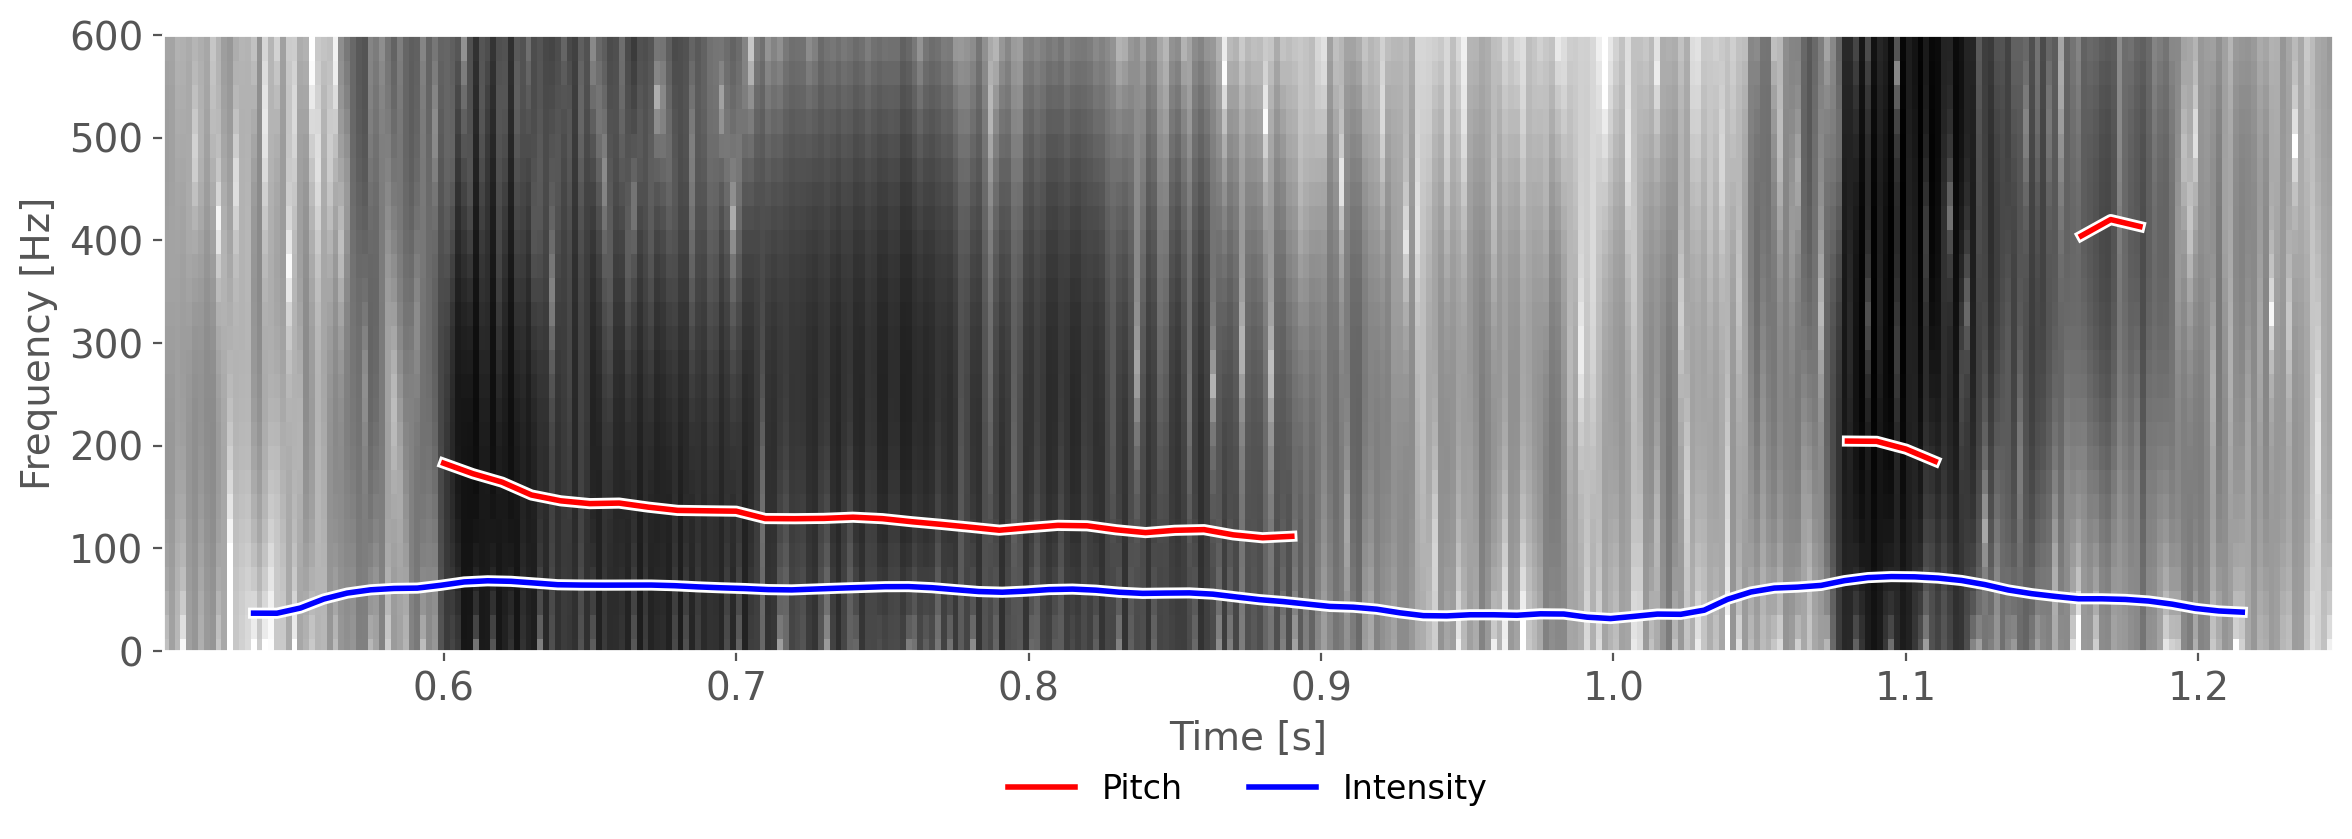

In [14]:
plt.figure(figsize=(14, 4), dpi=200)
draw_spectrogram(spec)
draw_pitch(pitch)
draw_intensity(intensity)
plt.xlabel("Time [s]", size=14)
plt.ylabel("Frequency [Hz]", size=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Pitch', 'Intensity'], loc='lower center',
           bbox_to_anchor=(0.5, -0.3), ncols=2,
           fontsize=12, frameon=False)
plt.grid(True)
plt.show()

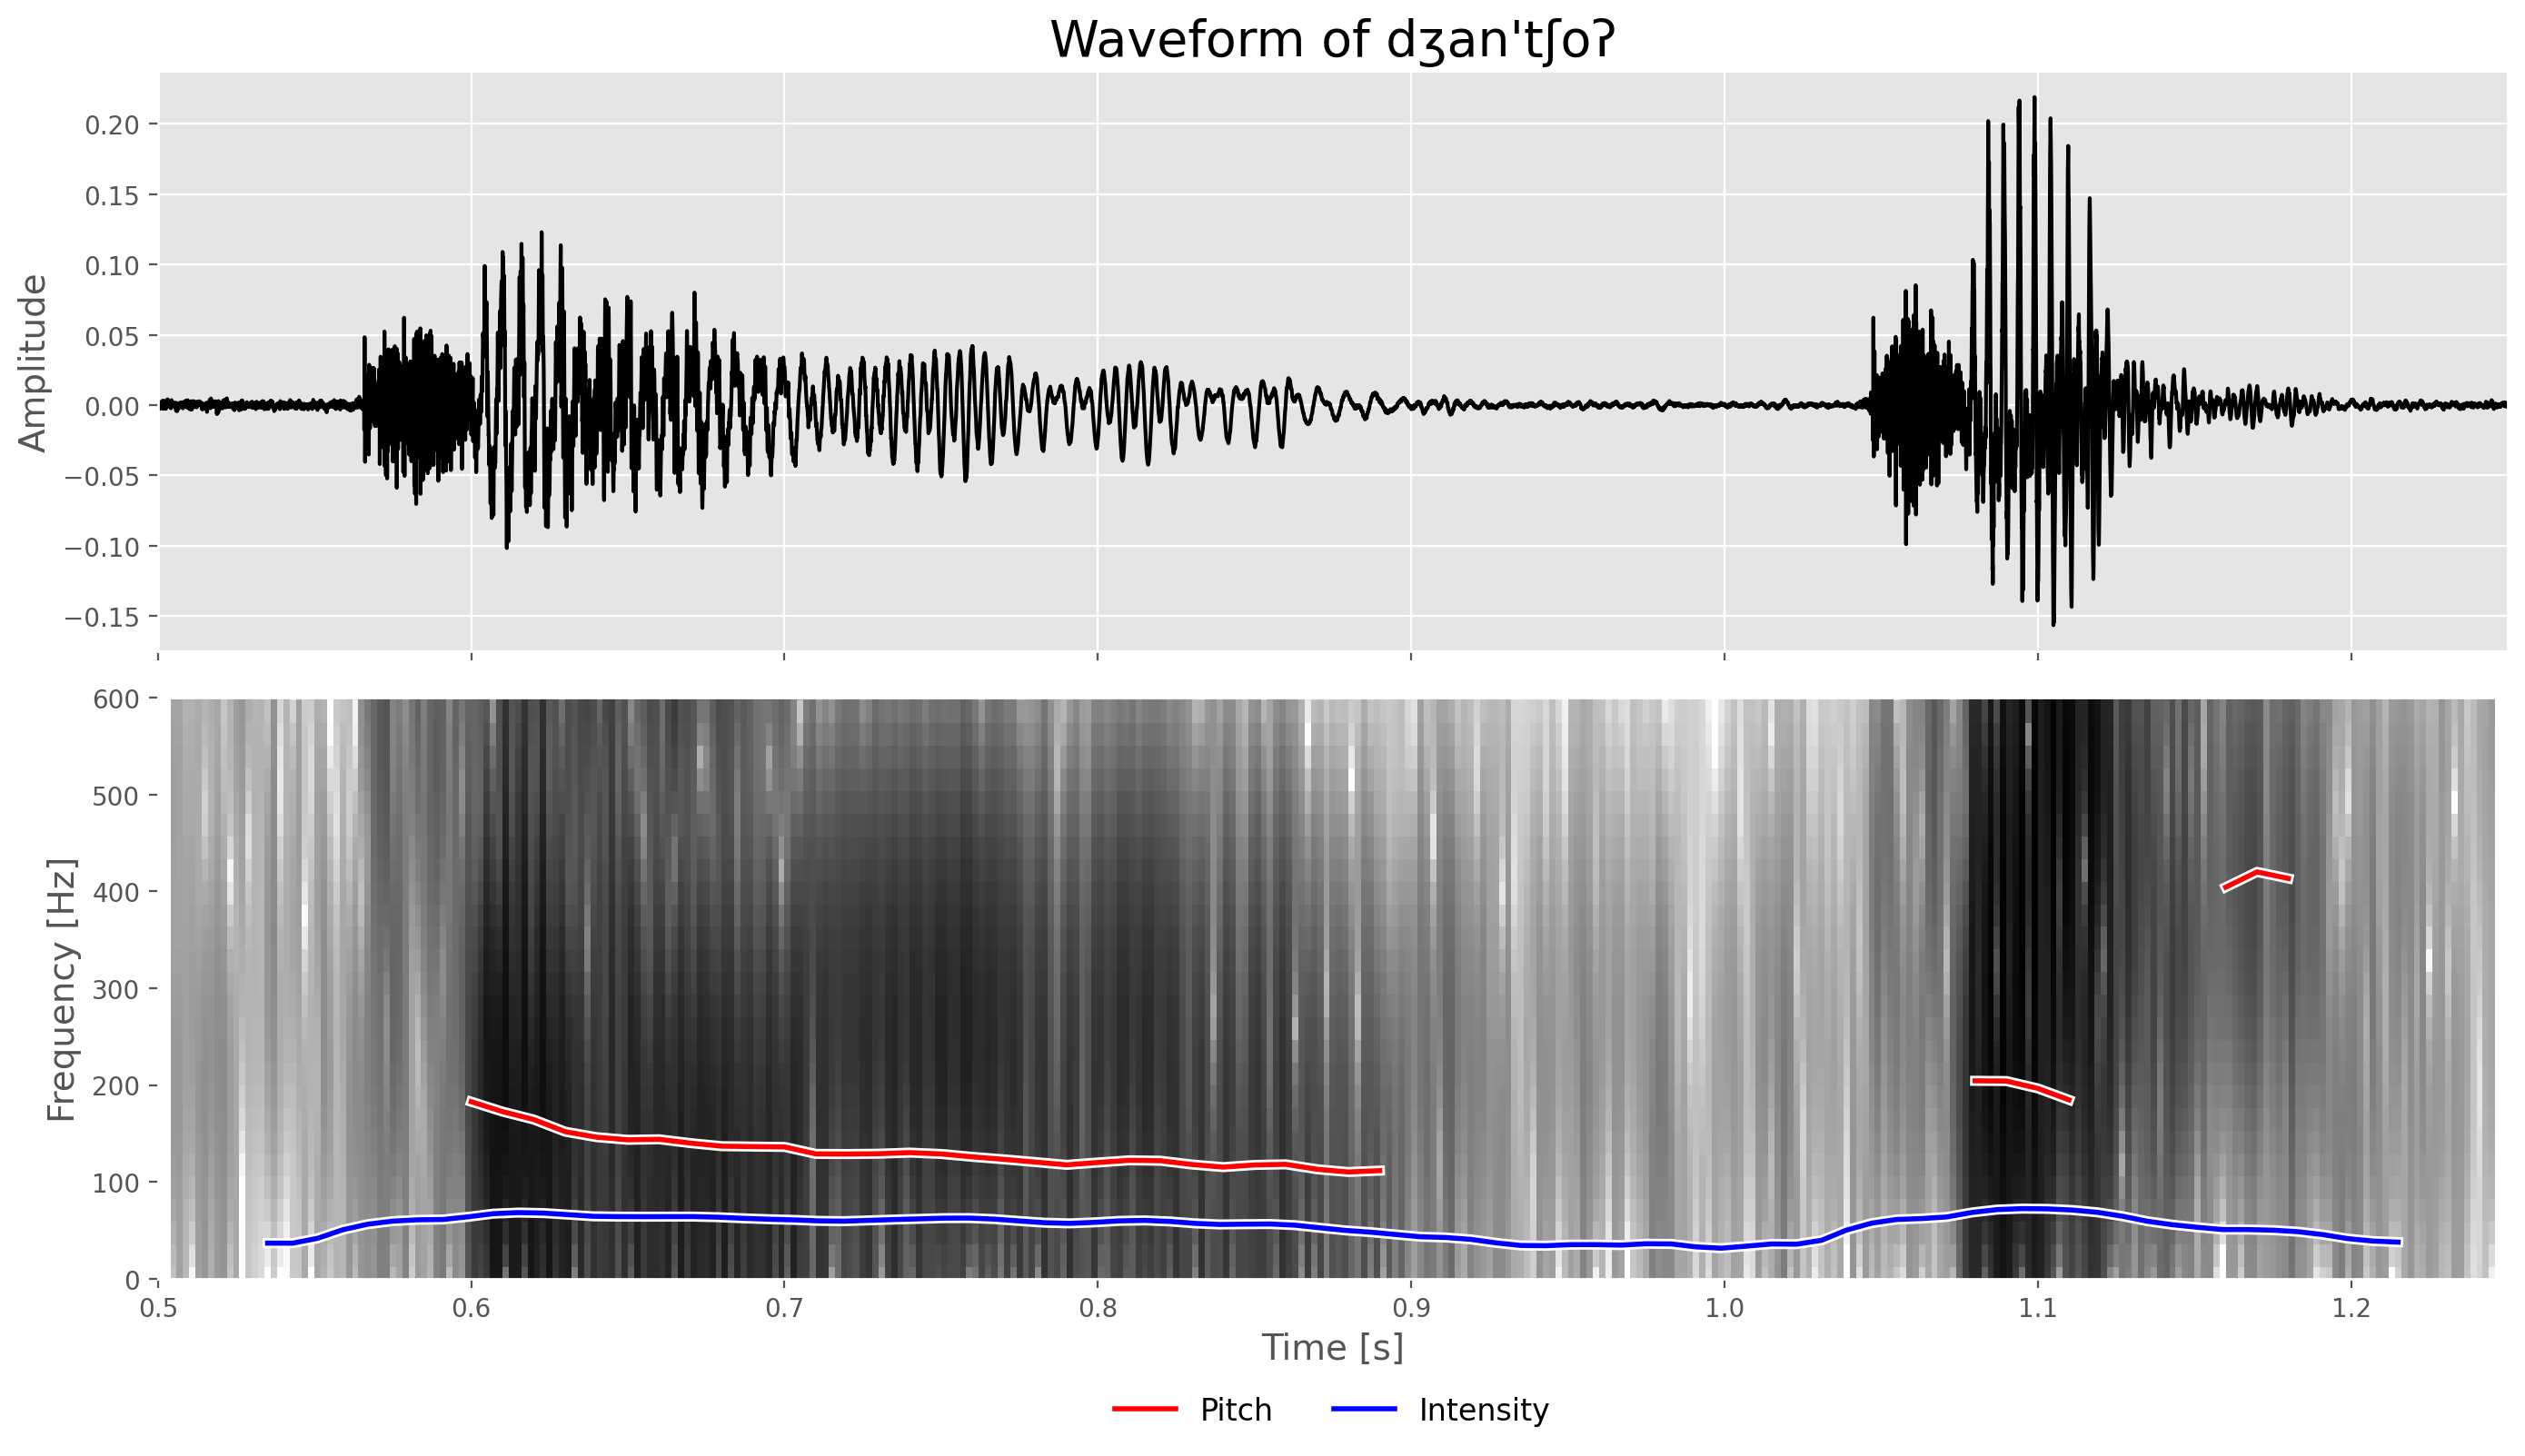

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), dpi=200, sharex=True)

# plot waveform in ax1
ax1.plot(snd_filtered.xs(), snd_filtered.values.T, color='black')
ax1.set_ylabel("Amplitude", size=14)
ax1.set_title("Waveform of dʒan'tʃoʔ", size=20)
ax1.grid(True)

# add spectogram, pitch, and intensity
ax2.set_facecolor('none')
plt.sca(ax2)
draw_spectrogram(spec)
draw_pitch(pitch)
draw_intensity(intensity)
ax2.set_xlabel("Time [s]", size=14)
ax2.set_ylabel("Frequency [Hz]", size=14)
ax2.grid(False)
ax2.legend(['Pitch', 'Intensity'], loc='lower center',
           bbox_to_anchor=(0.5, -0.3), ncols=2,
           fontsize=12, frameon=False)
x_min, x_max = 0.5, 1.25
ax1.set_xlim(x_min, x_max)
plt.tight_layout()
plt.show()

In [16]:
# call speech analysis with Praat
display(Image("./img/praat.png"))

Output hidden; open in https://colab.research.google.com to view.